In [1]:
import pandas as pd

# CMS Medicare Part D Quarterly Spending by Drug
partd_url = "https://data.cms.gov/data-api/v1/dataset/4ff7c618-4e40-483a-b390-c8a58c94fa15/data"

partd = pd.read_json(partd_url)

print("Shape:", partd.shape)
partd.head()


Shape: (1000, 11)


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Year,Tot_Benes,Tot_Clms,Tot_Spndng,Avg_Spnd_Per_Bene,Avg_Spnd_Per_Clm,Drug_Uses
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,2024 (Q1-Q4),213,378,10454.60,49.08,27.66,"""Drug uses not available"""
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,2024 (Q1-Q4),213,378,10454.60,49.08,27.66,"""Drug uses not available"""
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,2024 (Q1-Q4),451,965,26074.56,57.81,27.02,"""Drug uses not available"""
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,2024 (Q1-Q4),451,965,26074.56,57.81,27.02,"""Drug uses not available"""
4,Abacavir,Abacavir Sulfate,5,Overall,2024 (Q1-Q4),2351,16306,3054065.87,1299.05,187.30,"""USES: This drug is used with other HIV medic..."


In [2]:
partd.columns = (
    partd.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

partd.columns.tolist()


['brnd_name',
 'gnrc_name',
 'tot_mftr',
 'mftr_name',
 'year',
 'tot_benes',
 'tot_clms',
 'tot_spndng',
 'avg_spnd_per_bene',
 'avg_spnd_per_clm',
 'drug_uses']

In [3]:
partd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brnd_name          1000 non-null   object 
 1   gnrc_name          1000 non-null   object 
 2   tot_mftr           1000 non-null   int64  
 3   mftr_name          1000 non-null   object 
 4   year               1000 non-null   object 
 5   tot_benes          1000 non-null   object 
 6   tot_clms           1000 non-null   int64  
 7   tot_spndng         1000 non-null   float64
 8   avg_spnd_per_bene  1000 non-null   object 
 9   avg_spnd_per_clm   1000 non-null   float64
 10  drug_uses          1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [5]:
numeric_cols = [
    "tot_benes",
    "tot_clms",
    "tot_spndng",
    "avg_spnd_per_bene",
    "avg_spnd_per_clm"
]

for col in numeric_cols:
    partd[col] = pd.to_numeric(partd[col], errors="coerce")

partd[numeric_cols].describe()


,tot_benes,tot_clms,tot_spndng,avg_spnd_per_bene,avg_spnd_per_clm
count,9.490000e+02,1.000000e+03,1.000000e+03,949.000000,1000.000000
mean,1.243656e+05,3.182515e+05,2.055566e+07,11242.854341,2615.768620
std,6.658556e+05,2.054293e+06,8.325473e+07,54356.966505,12367.593088
min,1.100000e+01,1.100000e+01,3.910000e+00,1.500000,0.280000
25%,1.660000e+02,3.340000e+02,5.930524e+04,62.930000,25.095000
50%,1.221000e+03,3.223000e+03,7.357783e+05,323.580000,124.710000
75%,1.188000e+04,3.273725e+04,5.651298e+06,1990.550000,638.697500
max,1.219631e+07,5.020551e+07,8.192655e+08,672290.870000,171466.210000


In [6]:
partd_overall = partd[partd["mftr_name"] == "Overall"].copy()

print("Overall rows:", partd_overall.shape)
partd_overall.head()


Overall rows: (256, 11)


,brnd_name,gnrc_name,tot_mftr,mftr_name,year,tot_benes,tot_clms,tot_spndng,avg_spnd_per_bene,avg_spnd_per_clm,drug_uses
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,2024 (Q1-Q4),213.0,378,10454.60,49.08,27.66,"""Drug uses not available"""
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,2024 (Q1-Q4),451.0,965,26074.56,57.81,27.02,"""Drug uses not available"""
4,Abacavir,Abacavir Sulfate,5,Overall,2024 (Q1-Q4),2351.0,16306,3054065.87,1299.05,187.30,"""USES: This drug is used with other HIV medic..."
10,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,4,Overall,2024 (Q1-Q4),2467.0,17348,5785643.94,2345.21,333.50,"""USES: This product contains 2 drugs: abacavi..."
15,Abilify,Aripiprazole,1,Overall,2024 (Q1-Q4),1480.0,7139,7075287.73,4780.60,991.08,"""USES: This medication is used to treat certa..."


In [7]:
drug_spending = (
    partd_overall
    .groupby("brnd_name")["tot_spndng"]
    .sum()
    .reset_index()
    .sort_values("tot_spndng", ascending=False)
)

drug_spending.head(10)


,brnd_name,tot_spndng
192,Anoro Ellipta,819265525.1
215,Arexvy,774220218.9
64,Adempas,694246753.4
8,Abiraterone Acetate,692951282.4
6,Abilify Maintena,644205287.3
103,Albuterol Sulfate HFA,552650474.2
10,Abrysvo,467567623.8
29,Acthar,360057228.5
72,Advair HFA,320597369.1
160,Amlodipine Besylate,315700055.8


In [8]:
total_spend = drug_spending["tot_spndng"].sum()

drug_spending["spend_share"] = drug_spending["tot_spndng"] / total_spend
drug_spending["cumulative_share"] = drug_spending["spend_share"].cumsum()

drug_spending.head(10)


,brnd_name,tot_spndng,spend_share,cumulative_share
192,Anoro Ellipta,819265525.1,0.079633,0.079633
215,Arexvy,774220218.9,0.075254,0.154887
64,Adempas,694246753.4,0.067481,0.222368
8,Abiraterone Acetate,692951282.4,0.067355,0.289722
6,Abilify Maintena,644205287.3,0.062617,0.352339
103,Albuterol Sulfate HFA,552650474.2,0.053718,0.406057
10,Abrysvo,467567623.8,0.045448,0.451504
29,Acthar,360057228.5,0.034998,0.486502
72,Advair HFA,320597369.1,0.031162,0.517664
160,Amlodipine Besylate,315700055.8,0.030686,0.548350


In [9]:
drug_spending[drug_spending["cumulative_share"] <= 0.5].shape[0]


8

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "axes.edgecolor": "#ff3333",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "figure.autolayout": True,
    "axes.titleweight": "bold",
    "axes.titlecolor": "white",
    "grid.color": "#444444",
})

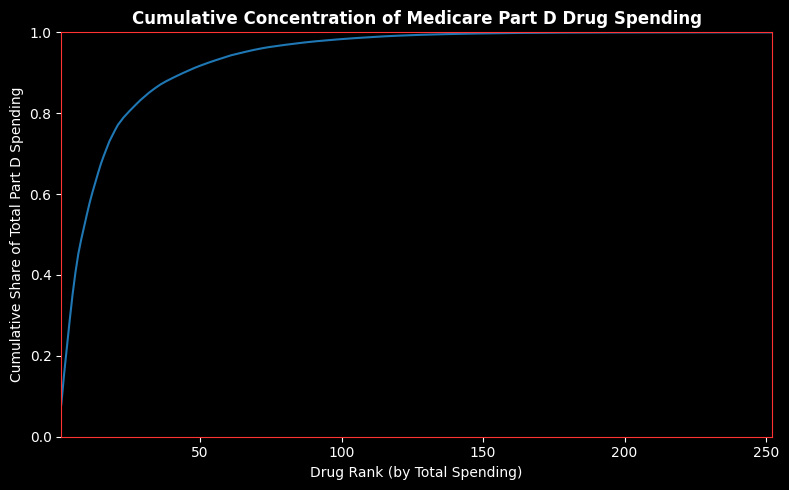

In [11]:
import matplotlib.pyplot as plt

# Prepare data (already sorted, but we ensure it)
drug_spending_sorted = drug_spending.sort_values(
    "tot_spndng", ascending=False
).reset_index(drop=True)

# Create rank axis
drug_spending_sorted["drug_rank"] = drug_spending_sorted.index + 1

# Plot cumulative spending curve
plt.figure(figsize=(8, 5))
plt.plot(
    drug_spending_sorted["drug_rank"],
    drug_spending_sorted["cumulative_share"]
)

plt.xlabel("Drug Rank (by Total Spending)")
plt.ylabel("Cumulative Share of Total Part D Spending")
plt.title("Cumulative Concentration of Medicare Part D Drug Spending")

plt.ylim(0, 1)
plt.xlim(1, drug_spending_sorted["drug_rank"].max())

plt.tight_layout()
plt.show()
